In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [14]:
start_date = '2018-01-01'
end_date = '2022-12-31'
stock = ["GOOGL", "AAPL", "ORCL", "MSFT", "AMZN"]
data = yf.download(stock, start_date, end_date)["Close"]

[*********************100%***********************]  5 of 5 completed


In [ ]:
data1 = (data.diff()+abs(data.diff()))/2
data1

In [52]:
a= data1.rolling(3).sum()/abs(data.diff()).rolling(3).sum()
1*(a>0.6)-1*(a<0.4)

,AAPL,AMZN,GOOGL,MSFT,ORCL
Date,,,,,
2018-01-02,0,0,0,0,0
2018-01-03,0,0,0,0,0
2018-01-04,0,0,0,0,0
2018-01-05,1,1,1,1,1
2018-01-08,1,1,1,1,1
...,...,...,...,...,...
2022-12-23,0,0,0,-1,0
2022-12-27,-1,-1,-1,-1,-1
2022-12-28,-1,-1,-1,-1,0


In [118]:
class Result():
    def __init__(self, data, lag):
        self.data = data
        self.lag = lag

        self.returns = self.data.pct_change()
        self.diff_data = self.data.diff()
        self.abs_diff_data = abs(self.diff_data)
        self.nominator_data =(self.diff_data+self.abs_diff_data)/2
        self.prob = self.nominator_data.rolling(self.lag).sum()/self.abs_diff_data.rolling(self.lag).sum()
    def get_return(self):
        sig = 1*(self.prob>0.5)-1*(self.prob<0.5)
        r = (sig*self.returns.shift(-1))
        return r
        
    def get_strategy_return(self):
        return np.prod(1+self.get_return())**(252/len(self.get_return()))-1

    def get_sharpe(self):
        r =self.get_return()
        try:
            return (self.get_strategy_return())/(np.std(r)*np.sqrt(252))
        except Exception:
            return 0      

    def get_summary(self):
        df = pd.concat([pd.DataFrame(self.get_strategy_return()).T,pd.DataFrame(self.get_sharpe()).T])
        df["Performance"]=["return", "sharpe"]
        return df.set_index("Performance")
        
    def get_plot(self):
        r =self.get_return()
        plt.plot(np.cumprod(1+r), label=r.columns)
        # plt.plot(np.cumprod(1+self.data["return"]), label="buy and hold") 
        plt.title("Cumulative return") 
        plt.legend()   

In [122]:
kq = Result(data,5)

In [123]:
kq.get_summary()

,AAPL,AMZN,GOOGL,MSFT,ORCL
Performance,,,,,
return,0.045397,-0.052286,-0.202702,-0.141464,-0.089945
sharpe,0.135447,-0.146133,-0.646323,-0.455309,-0.301301


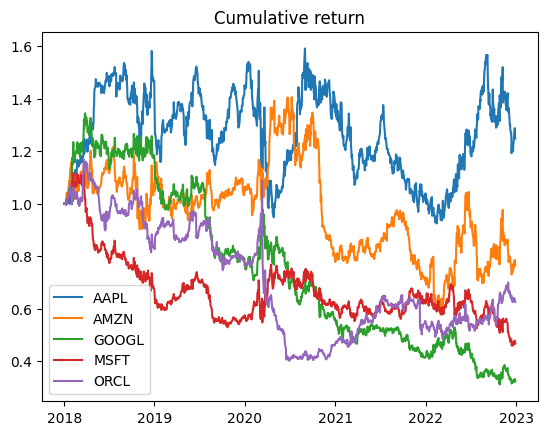

In [124]:
kq.get_plot()